## Solution

In [1]:
import scipy.misc
import numpy as np


def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

#I = img/256.0
#print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numba


@numba.njit
def get_iter_frac(c:complex, m:int, max_steps:int,alpha1,alpha2,alpha3,s) -> int:
 
    def Qc(z,m,c):
        z = z.conjugate()
        return np.power(z,m) - np.power(z,1)+  c
    def boundry_limit(mu,s,a):
        return (mu - abs(s*a))/(abs(s*a))
  
    z = 0.5
    
    i=0
    R = max(abs(c),boundry_limit(2,s,alpha1),boundry_limit(2,s,alpha2),boundry_limit(2,s,alpha3)) 
   
    while i<max_steps :
        z = Qc(z,m,c)
       
      
        
        wn = np.power((1-alpha3),s)*z + np.power((alpha3),s)*Qc(z,m,c)
     
        vn = np.power((1-alpha2),s)*Qc(z,m,c) + np.power((alpha2),s)*Qc(wn,m,c)
    
        
        z = np.power((1-alpha1),s)*vn + np.power((alpha1),s)*Qc(vn,m,c)
        
        if abs(z) >R  :
            break 
        i+=1
     
    return i


@numba.njit
def get_iter_julia(z:complex, c:complex, m:int, max_steps:int,alpha1,alpha2,alpha3,s) -> int:
    def Qc(z,m,c):
        z = z.conjugate()
        return np.power(z,m) - np.power(z,1)+ c
    
    def boundry_limit(mu,s,a):
        return (mu - abs(s*a))/(abs(s*a))
   
    
    
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    
    i=0
    R = max(abs(c),boundry_limit(2,s,alpha1),boundry_limit(2,s,alpha2),boundry_limit(2,s,alpha3)) 
   
    while i<max_steps :
        z = Qc(z,m,c)
       
      
        
        wn = np.power((1-alpha3),s)*z + np.power((alpha3),s)*Qc(z,m,c)
     
        vn = np.power((1-alpha2),s)*Qc(z,m,c) + np.power((alpha2),s)*Qc(wn,m,c)
    
        
        z = np.power((1-alpha1),s)*vn + np.power((alpha1),s)*Qc(vn,m,c)
        
        
        if abs(z) >R  :
            break 
        i+=1
     
    return i
@numba.njit
def plotter(n,m,  max_steps,type_plot,alpha1,alpha2,alpha3,s):
    mx = 3.48 / (n-1)
    my = 3.48 / (n-1)
    mapper = lambda x,y: (mx*x - 1.7, my*y - 1.7)
    img=np.full((n,n), 255)
    arr = np.arange(n)
    for x in range(n):
        for y in range(n):
            if (type_plot == 'Julia'):
                it = get_iter_julia(complex(*mapper(x,y)),complex(0.2,-0.2),m, max_steps,alpha1,alpha2,alpha3,s)
            elif (type_plot == 'AntiFrac'):
                it = get_iter_frac(complex(*mapper(x,y)),m, max_steps,alpha1,alpha2,alpha3,s)
            else:
                break
                
            img[y][x] = 255- it
    return img


## Tricorns Changing S from 0.01 to 0.999

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


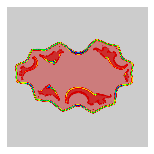

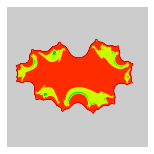

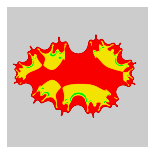

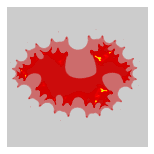

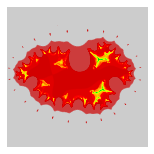

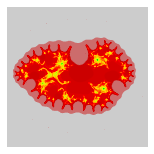

In [33]:
alpha1= 0.1
alpha2=0.1
alpha3=0.1
s = [0.001,0.1,0.3,0.5,0.7,0.999]
var_list = []
unique_colors = []
MinkowskiBouligand = []
n = 1000
for ss in s:
    
    img = plotter(n, 3, 50,'Julia',alpha1,alpha2,alpha3,ss)
    var_list.append(np.var(img))
    unique_colors.append(len(np.unique(img)))
    I = img/256.0
    MinkowskiBouligand.append(fractal_dimension(I))
    plt.figure(figsize=(2.56,2.58))
    plt.imshow(img, cmap='nipy_spectral')
    plt.axis("off")
    plt.savefig(f'quadcorn_quad_{ss}.jpg')

## Observation shapes get more varied and patterns are more richer, outline fractacls increase and total pixel variance increase with increses S

## comparison of s with variance and s with unique colors

$$ Y = X^ 2 + 2 $$ 

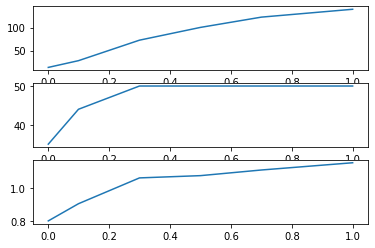

In [53]:
plt.figure(1)
plt.subplot(311)
plt.plot(s,var_list)
plt.subplot(312)
plt.plot(s, unique_colors)
plt.subplot(313)
plt.plot(s, MinkowskiBouligand)
plt.show()

### Experiment increase in alpha values

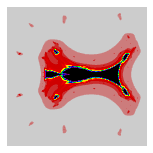

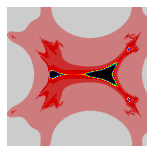

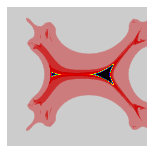

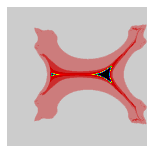

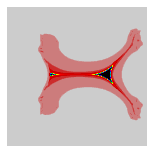

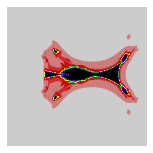

In [23]:

alphas = [0.001,0.1,0.3,0.5,0.7,0.999]
s = 0.5
var_list = []
unique_colors = []
MinkowskiBouligand = []
n = 1000
for a in alphas:
    alpha1= alpha2 = alpha3 =  a
    img = plotter(n, 3, 50,'AntiFrac',alpha1,alpha2,alpha3,s)
    var_list.append(np.var(img))
    unique_colors.append(len(np.unique(img)))
    I = img/256.0
    MinkowskiBouligand.append(fractal_dimension(I))
    plt.figure(figsize=(2.56,2.56))
    plt.imshow(img, cmap='nipy_spectral')
    plt.axis("off")
    plt.savefig(f'tricorn_alphas_is_{a}.jpg')

## Observation 2: Values of fractal variance follows U curve when changing all values of alphas

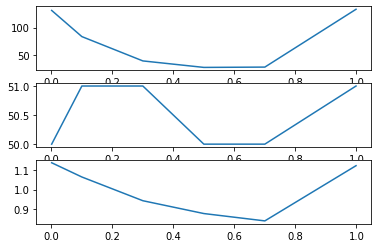

In [59]:
plt.figure(1)
plt.subplot(311)
plt.plot(alphas,var_list)
plt.subplot(312)
plt.plot(alphas, unique_colors)
plt.subplot(313)
plt.plot(alphas, MinkowskiBouligand)
plt.show()

## Multicorn power variance

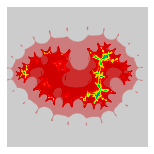

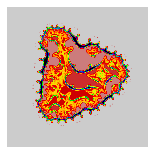

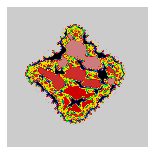

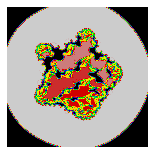

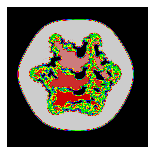

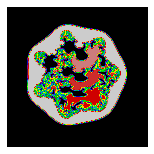

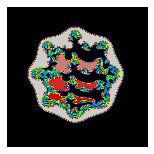

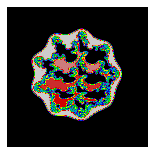

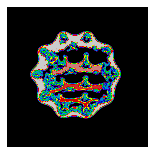

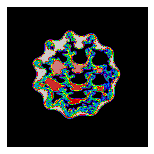

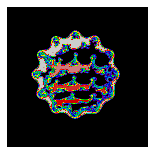

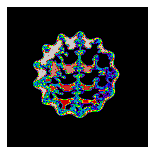

In [29]:
alpha1= 0.03
alpha2=0.03
alpha3=0.03
s = 0.5
n=1800
var_list = []
unique_colors = []
MinkowskiBouligand = []
m = [3,4,5,6,7,8,9,10,11,12,13,14]
for powers in m:
    
    img = plotter(n, powers, 50,'Julia',alpha1,alpha2,alpha3,s)
    var_list.append(np.var(img))
    unique_colors.append(len(np.unique(img)))
    I = img/256.0
    MinkowskiBouligand.append(fractal_dimension(I))
    plt.figure(figsize=(2.56,2.58))
    plt.imshow(img, cmap='nipy_spectral')
    plt.axis("off")
    plt.savefig(f'antijuliapower{powers}.jpg')

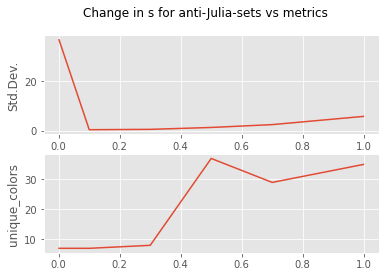

In [34]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Change in s for anti-Julia-sets vs metrics')

ax1.plot(s, var_list)
ax1.set_ylabel('Std.Dev.')

ax2.plot(s, unique_colors)
ax2.set_ylabel('unique_colors')



plt.savefig(f'powerMulticorn1111.jpg')

## Observation 3: Increase power anti fractals increases the pixel variance, the total colors remains constant while the fractals dimensionatlity decreases gradually after sudden increase